In [813]:
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
from matplotlib import style
style.use('ggplot') # om rasters te creeren en zo punten beter af te kunnen lezen
plt.rcParams['figure.figsize'] = [14,7] # set size of graphs

In [814]:
# Function to perform matrix multiplication
def dot_product(matrix1, matrix2):
    matrix1_rows = len(matrix1)
    matrix1_cols = len(matrix1[0])
    matrix2_rows = len(matrix2)
    matrix2_cols = len(matrix2[0])
    
    # if columns of first are not equal to rows of second, matrix multiplication is not possible
    if matrix1_cols != matrix2_rows: 
        raise Exception("Matrix multiplication is not possible because "+ str(matrix1_cols) +' != '+str(matrix2_rows))
    
    # create new empty productmatrix with size; amount of rows of first and columns of second
    productmatrix = [[0 for row in range(matrix2_cols)] for col in range(matrix1_rows)]
    
    # perform multiplication and create new matrix with product of 2 given matrices
    for i in range(matrix1_rows):
        for j in range(matrix2_cols):
            for h in range(matrix1_cols):
                productmatrix[i][j] += matrix1[i][h] * matrix2[h][j]
            
    return productmatrix

3 toestanden:<br>

|  Vandaag/Morgen   | Morgen hongerig   | Morgen tevreden | Morgen opgejaagd |
|------|------|------|------|
|   Vandaag hongerig  | 80% | 10% | 10% |
|   Vandaag tevreden  | 40% | 50% | 10% |
|   Vandaag opgejaagd  | 60% | 20% | 20% |

4 toestanden:<br>

|  Vandaag/Morgen   | Morgen hongerig   | Morgen tevreden | Morgen opgejaagd | Morgen dorst |
|------|------|------|------|------|
|   Vandaag hongerig  | 50% | 10% | 10% | 30% |
|   Vandaag tevreden  | 40% | 40% | 10% | 10% |
|   Vandaag opgejaagd  | 40% | 20% | 20% | 20% |
|   Vandaag dorst  | 40% | 10% | 20% | 20% | 10% |


In [815]:
# with lots of help from:
# https://www.youtube.com/watch?v=ZENBQj2qQ2k
# https://www.youtube.com/watch?v=IYaOMor9qvE
# https://en.wikipedia.org/wiki/Markov_chain
# https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html
def long_term_probability_days(matrix):
    days = 1 # starting with day 1
    matrix_matrix = [[0 for row in range(len(matrix[0]))] for col in range(len(matrix))]
    
    while not np.allclose(matrix_matrix, matrix):
        matrix_matrix = matrix
        matrix = dot_product(matrix_matrix, matrix_matrix)
        days += 1
        
    return days

In [816]:
def transpose_matrix(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

In [817]:
def get_plot_data(matrix, vector, days):
    plot_data = []
    plot_data.append(vector[0]) # add first starting vector

    for d in range(days + 2): # +2 to show a little bit extra
        vector = dot_product(vector, matrix)
        plot_data.append(vector[0])
        
    return transpose_matrix(plot_data)

In [818]:
def plot_probabilities(matrix, vector, labels, title):
    days = long_term_probability_days(matrix)
    plot_data = get_plot_data(matrix, vector, days)

    for i, vector in enumerate(plot_data):
        plt.plot(vector, label=labels[i])
    
    plt.title(title)
    plt.xlabel('Tijd in dagen ->')
    plt.ylabel('Kans x100 ->')
    plt.legend(loc='upper left')
    plt.show()

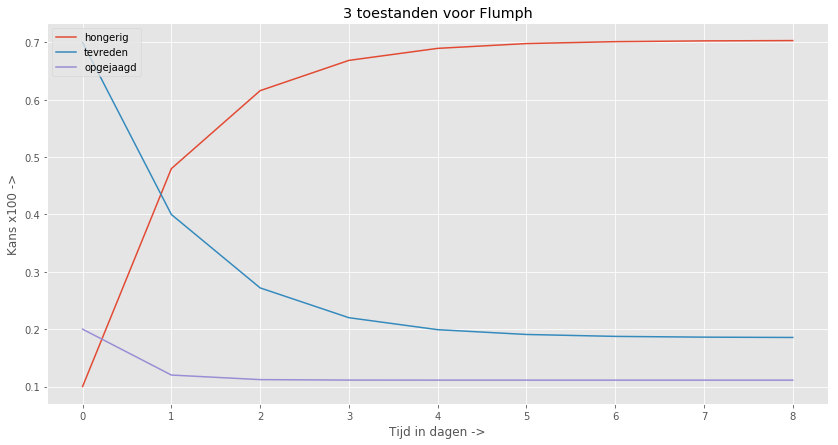

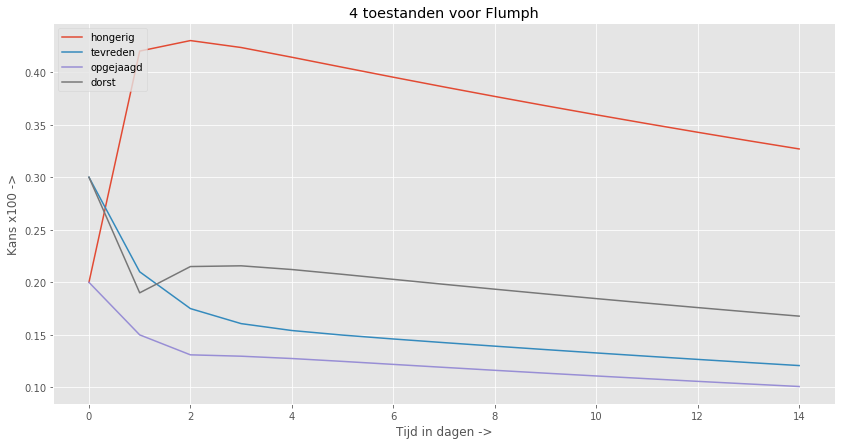

In [819]:
if __name__ == '__main__':
    # 3 states:
    matrix_three_states = [[0.8, 0.1, 0.1], # hongerig
                          [0.4, 0.5, 0.1], # tevreden
                          [0.6, 0.2, 0.2]] # opgejaagd
    vector_three_states = [[0.1, 0.7, 0.2]] # start kans
    labels_three_states = ["hongerig","tevreden","opgejaagd"]
    
    plot_probabilities(matrix_three_states, vector_three_states, labels_three_states, "3 toestanden voor Flumph")
        
    # 4 states:
    matrix_four_states = [[0.5, 0.1, 0.1, 0.3], # hongerig
                         [0.4, 0.4, 0.1, 0.1], # tevreden
                         [0.4, 0.2, 0.2, 0.2], # opgejaagd
                         [0.4, 0.1, 0.2, 0.2]] # dorst
    vector_four_states = [[0.2, 0.3, 0.2, 0.3]] # start kans
    labels_four_states = ["hongerig","tevreden","opgejaagd","dorst"]
    
    plot_probabilities(matrix_four_states, vector_four_states, labels_four_states, "4 toestanden voor Flumph")